# Как качаем

1. Ищем сайт с топами по жанрам (либо поскать плейлисты в Spotify/Я.Музыке)
2. Парсим название и исполнителя
3. Ищем в spotify api
4. Берем мету (ниже)
5. Берем spotify_id идем в youtube (либо youtube_dl либо ytmdl)
6. Скачиваем

# Сколько качаем


Сначала можно взять по 20 треков для каждого жанра, потом уже можно

# Что качаем

Сначала лучше хранить сырые mp3, т.к. пока непонятно как именно хотим обрабатывать (спектрограммы, мел-спектрограммы, ???). Так же будем хранить мету (в spotify есть "продвинутая" мета)

# Куда качаем

Yandex S3 вероятно будет норм

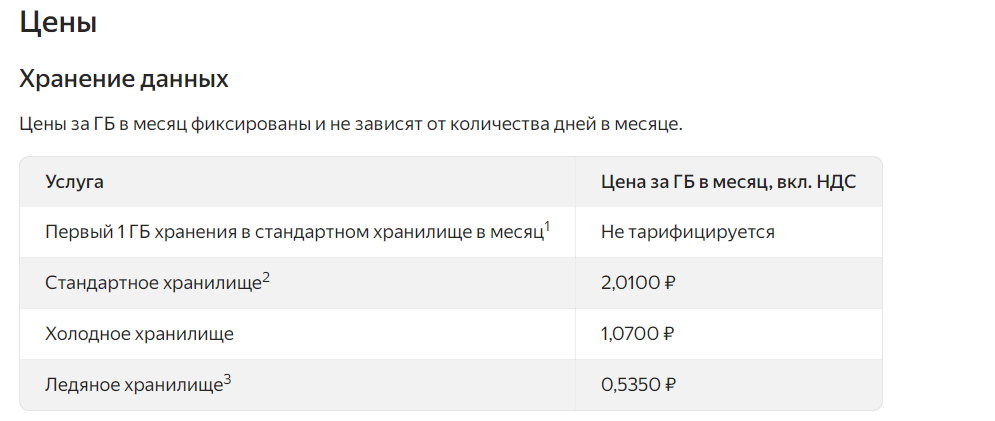

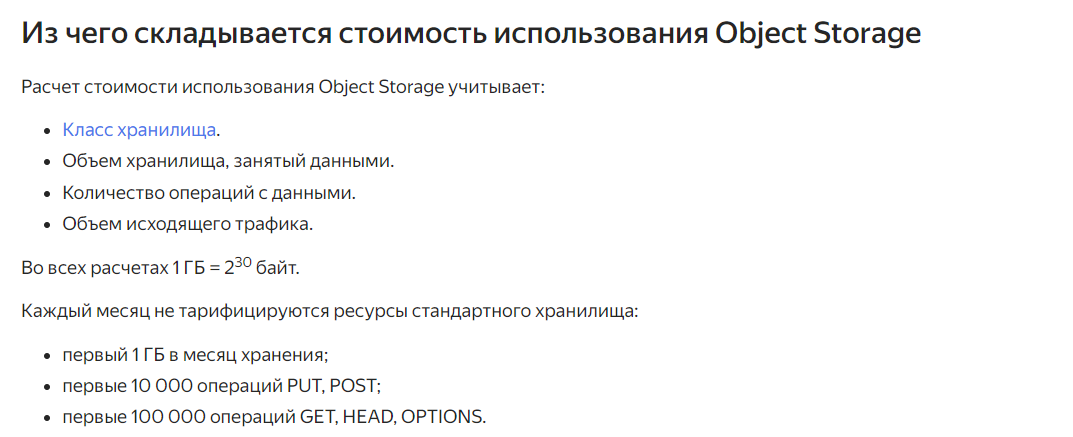

# Spotify

Getting Started https://developer.spotify.com/documentation/web-api/tutorials/getting-started

1. Нужно создать приложение в Dashboard (https://developer.spotify.com/dashboard)
2. Дальше создаем access token. Токен выдается на час
3. Есть функционал для создания плейлистов
4. Есть функционал для поиска треков/плейлистов/артистов по ID

Треки не скачать, но дальше можно использовать

#### Пример использования

In [ ]:
"""Spotify API description notebook."""
import os

import requests

SPOTIFY_TOKEN_URL = "https://accounts.spotify.com/api/token"
token_headers = {
    "Content-Type": "application/x-www-form-urlencoded",
}

client_id = "..."
client_secret = "..."
token_body = f"grant_type=client_credentials&client_id={client_id}&client_secret={client_secret}"

response = requests.post(SPOTIFY_TOKEN_URL, data=token_body, headers=token_headers).json()

In [ ]:
request_headers = {
    "Authorization": f"{response['token_type']}  {response['access_token']}"
}

In [ ]:
example_url = "https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb"
response_example = requests.get(example_url, headers=request_headers).json()

In [ ]:
response_example

{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'},
 'followers': {'href': None, 'total': 8818401},
 'genres': ['alternative rock',
  'art rock',
  'melancholia',
  'oxford indie',
  'permanent wave',
  'rock'],
 'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb',
 'id': '4Z8W4fKeB5YxbusRsdQVPb',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eba03696716c9ee605006047fd',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174a03696716c9ee605006047fd',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178a03696716c9ee605006047fd',
   'width': 160}],
 'name': 'Radiohead',
 'popularity': 80,
 'type': 'artist',
 'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}

#### Spotipy

In [ ]:
# ! pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 7.4 MB/s eta 0:00:00


##### Search api

In [2]:
import spotipy  # noqa: E402
from spotipy.oauth2 import SpotifyClientCredentials  # noqa: E402

client_id = "..."
client_secret = "..."

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [73]:
q = 'track:"Armed and Dangerous" artist:"Juice Wrld"'
tp = "track"
limit = 5

tracks = sp.search(q=q, type=tp, limit=limit)

In [74]:
nm = 0

tracks["tracks"]["items"][nm]["artists"], tracks["tracks"]["items"][nm]["name"], tracks["tracks"]["items"][nm]["id"]

([{'external_urls': {'spotify': 'https://open.spotify.com/artist/4MCBfE4596Uoi2O4DtmEMz'},
   'href': 'https://api.spotify.com/v1/artists/4MCBfE4596Uoi2O4DtmEMz',
   'id': '4MCBfE4596Uoi2O4DtmEMz',
   'name': 'Juice WRLD',
   'type': 'artist',
   'uri': 'spotify:artist:4MCBfE4596Uoi2O4DtmEMz'}],
 'Armed And Dangerous',
 '5wujBwqG7INdStqGd4tRMX')

In [32]:
results = sp.search(q='genre:"hip-hop"', type='track', limit=20)

In [ ]:
tracks.keys(), tracks["tracks"].keys()

(dict_keys(['tracks']),
 dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']))

In [33]:
len(results["tracks"]["items"])

20

In [48]:
nm = 14
results["tracks"]["items"][nm]["artists"], results["tracks"]["items"][nm]["name"]

([{'external_urls': {'spotify': 'https://open.spotify.com/artist/2YZyLoL8N0Wb9xBt1NhZWg'},
   'href': 'https://api.spotify.com/v1/artists/2YZyLoL8N0Wb9xBt1NhZWg',
   'id': '2YZyLoL8N0Wb9xBt1NhZWg',
   'name': 'Kendrick Lamar',
   'type': 'artist',
   'uri': 'spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/28ExwzUQsvgJooOI0X1mr3'},
   'href': 'https://api.spotify.com/v1/artists/28ExwzUQsvgJooOI0X1mr3',
   'id': '28ExwzUQsvgJooOI0X1mr3',
   'name': 'Jay Rock',
   'type': 'artist',
   'uri': 'spotify:artist:28ExwzUQsvgJooOI0X1mr3'}],
 'Money Trees')

In [ ]:
for key in tracks["tracks"]:
    if key == "items":
        continue
    print(f"{key}: {tracks['tracks'][key]}")

href: https://api.spotify.com/v1/search?query=Dark+Fantasy&type=track&offset=0&limit=3
limit: 3
next: https://api.spotify.com/v1/search?query=Dark+Fantasy&type=track&offset=3&limit=3
offset: 0
previous: None
total: 817


In [ ]:
tracks["tracks"]["items"][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [ ]:
tracks["tracks"]["items"][0]["explicit"]

True

In [ ]:
for key in tracks["tracks"]["items"][0]:
    if key in ["album", "available_markets"]:
        continue
    print(f"{key}: {tracks['tracks']['items'][0][key]}")

artists: [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x'}, 'href': 'https://api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQUkS6x', 'id': '5K4W6rqBFWDnAN6FQUkS6x', 'name': 'Kanye West', 'type': 'artist', 'uri': 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'}]
disc_number: 1
duration_ms: 280786
explicit: True
external_ids: {'isrc': 'USUM71027263'}
external_urls: {'spotify': 'https://open.spotify.com/track/7yNK27ZTpHew0c55VvIJgm'}
href: https://api.spotify.com/v1/tracks/7yNK27ZTpHew0c55VvIJgm
id: 7yNK27ZTpHew0c55VvIJgm
is_local: False
name: Dark Fantasy
popularity: 73
preview_url: None
track_number: 1
type: track
uri: spotify:track:7yNK27ZTpHew0c55VvIJgm


##### Get track

In [ ]:
track_id = "7yNK27ZTpHew0c55VvIJgm"

track = sp.track(track_id=track_id)

In [ ]:
track.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

##### Get track description

In [ ]:
track_id = "7yNK27ZTpHew0c55VvIJgm"

audio_feats = sp.audio_features(tracks=[track_id])

In [ ]:
audio_feats[0]

{'danceability': 0.599,
 'energy': 0.587,
 'key': 5,
 'loudness': -5.919,
 'mode': 1,
 'speechiness': 0.0423,
 'acousticness': 0.274,
 'instrumentalness': 0,
 'liveness': 0.167,
 'valence': 0.373,
 'tempo': 87.998,
 'type': 'audio_features',
 'id': '7yNK27ZTpHew0c55VvIJgm',
 'uri': 'spotify:track:7yNK27ZTpHew0c55VvIJgm',
 'track_href': 'https://api.spotify.com/v1/tracks/7yNK27ZTpHew0c55VvIJgm',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7yNK27ZTpHew0c55VvIJgm',
 'duration_ms': 280787,
 'time_signature': 4}

# Yandex Music

Можно скачивать треки, однако есть не все

API неофициальный https://yandex-music.readthedocs.io/en/main/

In [ ]:
# ! pip install -U yandex-music

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.6/168.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yandex-music: filename=yandex_music-2.1.1-py3-none-any.whl size=296623 sha256=3f90e5aef06dfbd72980cd76697605147b8636ed867c711e79b594e19f0a6bba
  Stored in directory: /root/.cache/pip/wheels/09/5b/23/f4fca5f6e04c097a70533d73e4de724e920f6b0d770a92a162
Successfully built yandex-music


In [ ]:
# так же есть async клиент, интерфейс такой же с суффиксом _async (ну и авейты надо писать)  
from yandex_music import Client  # noqa: E402

# client = Client('token').init() https://yandex-music.readthedocs.io/en/main/token.html
# Без токена ограниченные возможности, например качать только первые 30 сек можно

client = Client('token').init()

Yandex Music API v2.1.1, Copyright (C) 2019-2023 Ilya (Marshal) <https://github.com/MarshalX>
Licensed under the terms of the GNU Lesser General Public License v3 (LGPLv3)



In [ ]:
dir(client)

['_Client__notice_displayed',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_dislike_action',
 '_get_likes',
 '_get_list',
 '_id_attrs',
 '_like_action',
 '_request',
 'accountExperiments',
 'accountSettings',
 'accountSettingsSet',
 'accountStatus',
 'account_experiments',
 'account_settings',
 'account_settings_set',
 'account_status',
 'afterTrack',
 'after_track',
 'albums',
 'albumsWithTracks',
 'albums_with_tracks',
 'artists',
 'artistsBriefInfo',
 'artistsDirectAlbums',
 'artistsTracks',
 'artists_brief_info',
 'artists_direct_albums',
 'artists_tracks',
 'base_url',
 'chart',
 'consumePromoCode',
 'consu

# Soundcloud

Саундклауду плохо: нужны креды -> нужно создать приложение в апишке. Пишут создание приложений закрыто уже несколько лет

Токен нужен как минимум здесь:
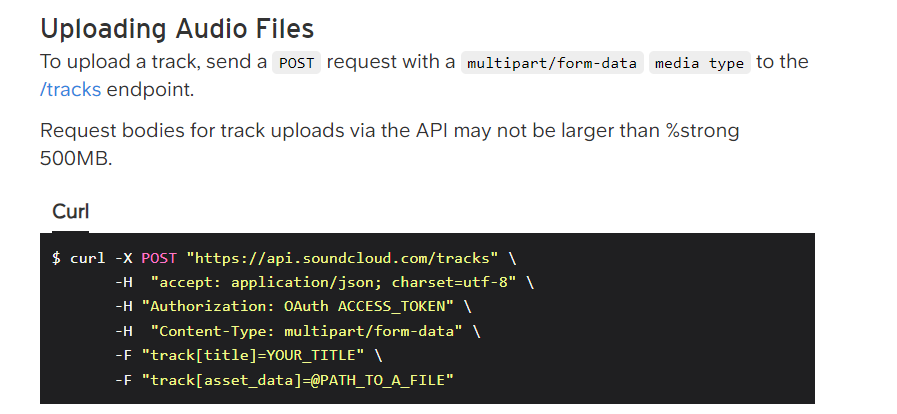

# ytmdl

In [ ]:
# ! pip install ytmdl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build

In [ ]:
! ytmdl -h

usage: ytmdl [-h] [-q] [-o OUTPUT_DIR] [--song SONG-METADATA] [--choice CHOICE] [--artist ARTIST]
             [--album ALBUM] [--disable-metaadd] [--skip-meta] [-m] [--itunes-id ITUNES_ID]
             [--spotify-id SPOTIFY_ID] [--disable-sort] [--ask-meta-name]
             [--on-meta-error ON_META_ERROR] [--proxy URL] [--url URL] [--list PATH TO LIST]
             [--nolocal] [--format FORMAT] [--trim] [--version] [--keep-chapter-name]
             [--download-archive FILE] [--ignore-chapters] [--ytdl-config PATH] [--dont-transcode]
             [--filename NAME] [--pl-start NUMBER] [--pl-end NUMBER] [--pl-items ITEM_SPEC]
             [--ignore-errors] [--title-as-name] [--level LEVEL] [--disable-file] [--list-level]
             [SONG_NAME ...]

positional arguments:
  SONG_NAME             Name of the song to download. Can be an URL to a playlist as well. It will
                        be automatically recognized.

options:
  -h, --help            show this help message and exit

In [ ]:
!ytmdl "Dark Fantasy" --spotify-id 7yNK27ZTpHew0c55VvIJgm # Есть --ouptut-dir

 ==> Searching to see if already present in /content 
 ==> Searching Youtube for Dark Fantasy 
 ==> Choose One (One with [M] is verified music) 
 [1] [M] Dark Fantasy by Kanye West with dur 4:41
 [2] Kanye West - Dark Fantasy ft. Teyana Taylor by Kanye West with dur 3:48
 [3] Kanye West - Dark Fantasy by RevollineumRadio with dur 4:42
 [4] [M] Dark Fantasy by Kanye West with dur 4:41
 [5] 3 Hours of Dark Fantasy Music - The Dark Trilogy by Adrian von Ziegler with dur 3:21:44
 [0] More results
 ==> Enter Choice (1): 1
 ==> Downloading Dark Fantasy in 320kbps 
 ==> Saving the files to: /root/.cache/ytmdl 
 ==> Downloaded! 
 ==> Direct Spotify lookup for 7yNK27ZTpHew0c55VvIJgm... 
 ==> Setting data... 
 ==> Preparing the album cover 
 ==> ================================
  || YEAR: 2010-11-22
  || TITLE: Dark Fantasy
  || ARTIST: Kanye West
  || ALBUM: My Beautiful Dark Twisted Fantasy
  || GENRE: 
  || TRACK NO: 1
  || ALBUM COVER ADDED
 ==> ================================
 ==> Moved to

In [ ]:
track_id = "7yNK27ZTpHew0c55VvIJgm" # из spotify api
track_name = "Dark Fantasy" # из spotify api
bash_cmd = f"ytmdl {track_name} -q --spotify-id {track_id}"

proc = os.popen(bash_cmd)
proc.read()

' ==> Searching to see if already present in /content \n ==> Quiet is enabled \n ==> Searching Youtube for Dark Fantasy \n ==> Downloading Dark Fantasy in 320kbps \n ==> Saving the files to: /root/.cache/ytmdl \n\n[download]   0.0% of    4.43MiB at  684.67KiB/s ETA 00:06\n[download]   0.1% of    4.43MiB at    1.29MiB/s ETA 00:03\n[download]   0.2% of    4.43MiB at    2.55MiB/s ETA 00:01\n[download]   0.3% of    4.43MiB at    4.69MiB/s ETA 00:00\n[download]   0.7% of    4.43MiB at    2.69MiB/s ETA 00:01\n[download]   1.4% of    4.43MiB at    2.91MiB/s ETA 00:01\n[download]   2.8% of    4.43MiB at    4.06MiB/s ETA 00:01\n[download]   5.6% of    4.43MiB at    5.87MiB/s ETA 00:00\n[download]  11.3% of    4.43MiB at    9.45MiB/s ETA 00:00\n[download]  22.5% of    4.43MiB at   15.77MiB/s ETA 00:00\n[download]  45.1% of    4.43MiB at   26.33MiB/s ETA 00:00\n[download]  90.2% of    4.43MiB at   44.83MiB/s ETA 00:00\n[download] 100.0% of    4.43MiB at   47.77MiB/s ETA 00:00\n[download] 100% of 

# youtube_dl

In [ ]:
# ! pip install youtube_dl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.4 MB/s eta 0:00:00


In [ ]:
import youtube_dl  # noqa: E402

In [ ]:
dir(youtube_dl)

['DEFAULT_OUTTMPL',
 'DateRange',
 'DownloadError',
 'FileDownloader',
 'MSO_INFO',
 'MaxDownloadsReached',
 'SameFileError',
 'YoutubeDL',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_real_main',
 'aes',
 'cache',
 'codecs',
 'compat',
 'compat_getpass',
 'compat_shlex_split',
 'decodeOption',
 'downloader',
 'expand_path',
 'extractor',
 'gen_extractors',
 'io',
 'jsinterp',
 'list_extractors',
 'main',
 'match_filter_func',
 'options',
 'os',
 'parseOpts',
 'postprocessor',
 'preferredencoding',
 'random',
 'read_batch_urls',
 'render_table',
 'setproctitle',
 'socks',
 'std_headers',
 'sys',
 'unicode_literals',
 'update',
 'update_self',
 'utils',
 'version',
 'workaround_optparse_bug9161',
 'write_string']

In [ ]:
save_path = ...
song_name = ...

ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': f'{save_path}/{song_name}.mp3',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
} # Не тестил
with youtube_dl.YoutubeDL(ydl_opts) as ydl: #  https://developers.google.com/youtube/v3/docs/search/list#parameters
    # Здесь ссылка на запущенное видео, нужны yt api креды, парсить плохо (Youtube Data API)
    ydl.download([f'http://www.youtube.com/watch?v={...}']) 

# Есть еще много пользовательских либ, при желании гуглится на гитхабе

# Что дальше

0. Сделать аккаунт/проект Yandex Cloud под проект (Слава)
1. Создать бакет под проект (Слава)
2. Будем хранить в endpoint'е tracks/genre_name/song_name(hash_song_name)/{spotify_meta.json, audio.mp3} (Инфо)
3. Нужно создать файлик: Жанр - топ 20 треков из жанра (либо sp.search по жанру, либо искать плейлисты в spotify) (Даня) (Пожелания: поразнороднее внутри жанра и по временной оси)
4. Пишем парсер (Никита)
5. Пишем скачиватель музыки (Даня)
6. Пишем объединятель/обертку над данными (Слава)
7. Тестим (60% пацаны не забываем) (Все)
8. Сохраняем спарсенное на S3 (На уровне объединятеля)

BaseParser() -> SpotifyParser(credentials) -> spotify_parser.get_song_info(song_name, song_artist) -> MusicDownloader(download_params) -> music_dwnd.download(List[Tuple[str, str]]) # (song_name, song_artist, spotify_id)